In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter
from scipy.signal import filtfilt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,6]

In [2]:
pupil = pd.read_csv('pupil_positions.csv')
pupil.head()

,timestamp,index,id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,378.049383,461,0,0.999485,0.713291,0.595145,37.705620,3d c++,228.253144,97.165107,...,-0.518035,-0.800776,1.860617,1.026245,-1.211617,187.582333,154.378883,209.712998,209.712998,90.0
1,378.081391,462,0,0.999543,0.712138,0.592764,37.697530,3d c++,227.884013,97.736751,...,-0.513154,-0.805225,1.858604,1.031941,-1.217295,187.582333,154.378883,209.712998,209.712998,90.0
2,378.117398,463,0,0.999285,0.712493,0.592968,37.501931,3d c++,227.997685,97.687756,...,-0.513561,-0.804596,1.849187,1.031467,-1.215950,187.582333,154.378883,209.712998,209.712998,90.0
3,378.149402,464,0,0.999552,0.713005,0.593164,37.789426,3d c++,228.161732,97.640702,...,-0.514007,-0.803769,1.863656,1.030947,-1.214019,187.582333,154.378883,209.712998,209.712998,90.0
4,378.181396,465,0,0.999455,0.713111,0.594142,37.808426,3d c++,228.195534,97.405903,...,-0.515999,-0.802328,1.865120,1.028622,-1.212954,187.582333,154.378883,209.712998,209.712998,90.0


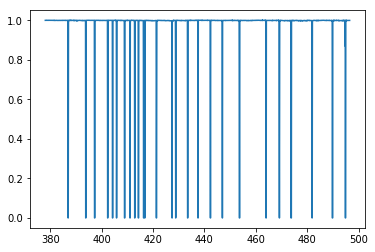

In [3]:
plt.plot(pupil['timestamp'],pupil['confidence'])

In [4]:
pupil['time']= pupil['timestamp']-pupil['timestamp'][0] 

In [5]:
for ind in pupil[pupil["confidence"]<0.5].index:
    if ind-1 > 0 and ind+1 < pupil.shape[0]:
        pupil.ix[ind, "norm_pos_x"] = pupil['norm_pos_x'].mean()
        pupil.ix[ind, "norm_pos_y"] = pupil['norm_pos_y'].mean()
        pupil.ix[ind, "confidence"] = pupil['confidence'].mean()

/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing

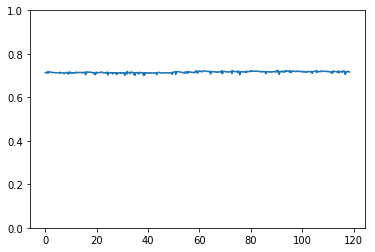

In [6]:
plt.ylim(0, 1.0)

plt.plot(pupil['time'],pupil['norm_pos_x'])

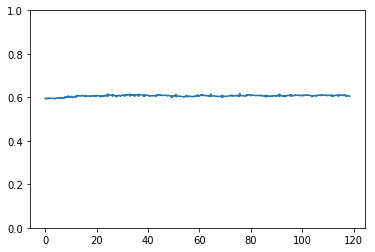

In [7]:
plt.ylim(0, 1.0)
plt.plot(pupil['time'],pupil['norm_pos_y'])

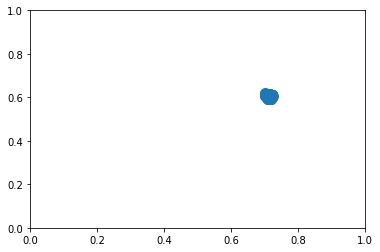

In [8]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.plot(pupil['norm_pos_x'],pupil['norm_pos_y'],marker = 'o',markersize = 10)

In [9]:
pupil_normal = pupil[: 1770]
pupil_dynamic = pupil[-1770 :]

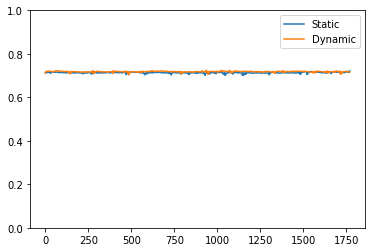

In [10]:
plt.ylim(0, 1.0)
plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_x'], label = 'Static')
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_x'], label = 'Dynamic')
plt.legend()

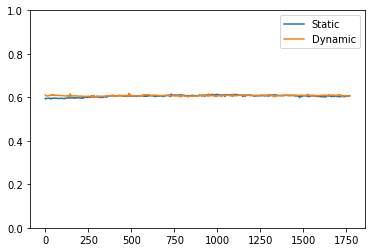

In [11]:
plt.ylim(0, 1.0)
plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_y'], label = 'Static')
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_y'], label = 'Dynamic')
plt.legend()

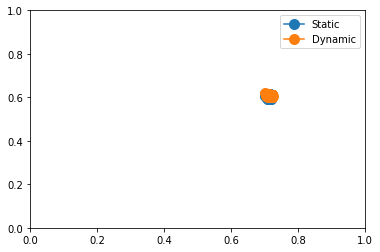

In [12]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)

plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_x'], pupil_normal['norm_pos_y'],label = 'Static',marker = 'o',markersize = 10)
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_x'], pupil_dynamic['norm_pos_y'],label = 'Dynamic',marker = 'o',markersize = 10)
plt.legend()

In [13]:
X_1 = pupil_normal['norm_pos_x'].mean()
X_2 = pupil_dynamic['norm_pos_x'].mean()

In [14]:
Y_1 = pupil_normal['norm_pos_y'].mean()
Y_2 = pupil_dynamic['norm_pos_y'].mean()


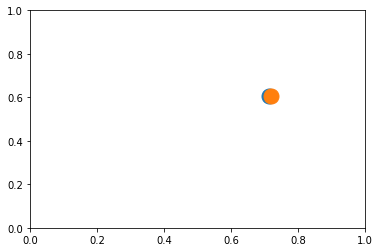

In [15]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.plot(X_1,Y_1,marker = 'o',markersize = 15)
plt.plot(X_2,Y_2,marker = 'o',markersize = 15)

In [16]:
from scipy.stats import ttest_ind
t1 = ttest_ind(pupil_normal['norm_pos_x'], pupil_dynamic['norm_pos_x'])
t1

Ttest_indResult(statistic=-69.73442182591334, pvalue=0.0)

# MSE

In [17]:
X_mean = pupil_normal['norm_pos_x'].mean()
mse = ((X_mean - pupil_normal['norm_pos_x']) ** 2).mean(axis = None)
mse

4.624232726348197e-06

In [18]:
Y_mean = pupil_normal['norm_pos_y'].mean()
mse = ((X_mean - pupil_normal['norm_pos_y']) ** 2).mean(axis = None)
mse

0.011617797476441268

In [19]:
mse = ((X_mean - pupil_dynamic['norm_pos_x']) ** 2).mean(axis = None)
mse

2.66503146251483e-05

In [20]:
mse = ((Y_mean - pupil_dynamic['norm_pos_y']) ** 2).mean(axis = None)
mse

8.874767879073954e-06

# VELOCITY

In [21]:
X_norm = pupil['norm_pos_x']
Y_norm = pupil['norm_pos_y']
f_s=300
f_c=2
b, a = butter(2, f_c/(f_s/2))
Y = filtfilt(b, a, Y_norm)
b, a = butter(2, f_c/(f_s/2))
X = filtfilt(b, a, X_norm)
f_c=100
def smooth(a,WSZ = 5):
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))
b, a = butter(2, f_c/(f_s/2))
dX = np.diff(filtfilt(b, a, X) * f_s)
dX = smooth(dX)
f_c=100
b, a = butter(2, f_c/(f_s/2))
dY = np.diff(filtfilt(b, a, Y) * f_s)
dY = smooth(dY)


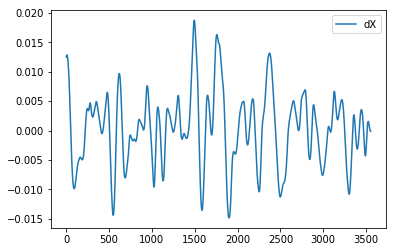

In [22]:
plt.plot(dX, label = 'dX')
plt.legend()

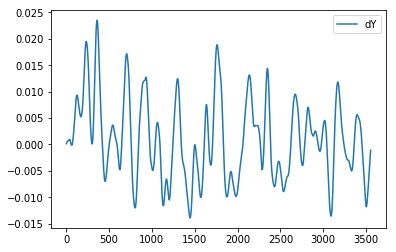

In [23]:
plt.plot(dY, label = 'dY')
plt.legend()
